# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dfBubbleSort = pd.read_csv("Results16/bubbleSort-PC16.csv")
dfBubbleSort.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV = pd.read_csv("Results16/readCSV-PC16.csv")
dfReadCSV.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]


#### Moving information from Test name to a seperate column 

In [2]:
#input type
l = []
for i in range(len(dfBubbleSort)):
    l.append(dfBubbleSort.iloc[i]["Test name"].split("-")[0])

dfBubbleSort["Input case"] = l


In [3]:
#input size

l = []
for i in range(len(dfBubbleSort)):
    l.append(dfBubbleSort.iloc[i]["Test name"].split("-")[1])

dfBubbleSort["Size"] = l

l = []
for i in range(len(dfReadCSV)):
    l.append(dfReadCSV.iloc[i]["Test name"].split("d")[-1])

dfReadCSV["Size"] = l

In [4]:
dfReadCSV["Time (ms)"].sum()/1000/60/60


5.783314213333333

#### Subtract readCSV from data

In [5]:
#Bubblesort
bgAVGbubbleRand = []
s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
l = []
for size in range(len(s)):
    bgAVGbubbleRand.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVRand{s[size]}"].mean())

for i in range(len(dfBubbleSort)):
    for size in range(len(s)):
        if (int(dfBubbleSort["Size"][i]) == s[size]):
            if(dfBubbleSort["Input case"][i] != "worst" and dfBubbleSort["Input case"][i] != "best"):
                l.append(dfBubbleSort["CPU (J)"][i] - bgAVGbubbleRand[size]["CPU (J)"])
            if(dfBubbleSort["Input case"][i] == "best"):
                l.append(0)                                         # We're missing sorted. Has been named "revsorted" in the Makefile for readCSV
            if(dfBubbleSort["Input case"][i] == "worst"):
                l.append(0)                                         # we need to redo rev-sorted. has been mixed with revsorted in the Makefile for readCSV

dfBubbleSort["CPU - BG"] = l

dfBubbleSort


,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms),Input case,Size,CPU - BG
0,random1-25000-1,13.232300,11.544128,,0.399902,69,1710.16,random1,25000,NaN
1,random1-25000-1,14.163696,12.361511,,0.493103,69,1723.56,random1,25000,NaN
2,random1-25000-1,13.530029,11.768127,,0.451172,69,1730.49,random1,25000,NaN
3,random1-25000-1,14.085632,12.302307,,0.486084,70,1704.74,random1,25000,NaN
4,random1-25000-1,14.142822,12.376465,,0.485718,70,1699.14,random1,25000,NaN
...,...,...,...,...,...,...,...,...,...,...
11754,worst-500000-1,815.602600,719.116455,,18.233643,64,107186.00,worst,500000,0.0
11755,worst-500000-1,806.500366,709.628906,,19.146301,57,107578.00,worst,500000,0.0
11756,worst-500000-1,808.787598,712.215637,,18.715515,63,107361.00,worst,500000,0.0
11757,worst-500000-1,810.676819,712.063965,,20.324219,57,108984.00,worst,500000,0.0


## PLOTS

#### Basic plots (raw data vs size/time)

<AxesSubplot:title={'center':'Bubblesort data'}, xlabel='Size', ylabel='Time (ms)'>

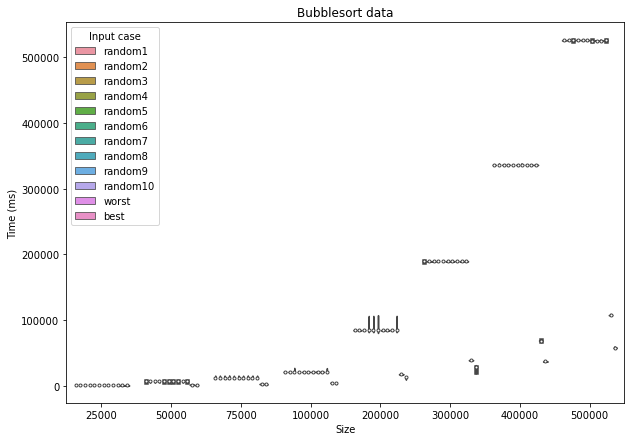

In [6]:
plt.figure(figsize=(10,7))
plt.title("Bubblesort data")
sns.violinplot(data = dfBubbleSort, y = "Time (ms)", x = "Size", hue ="Input case")

## ReadCSV subtracted from data PLOTS

<AxesSubplot:title={'center':'Bubblesort data'}, xlabel='Size', ylabel='CPU - BG'>

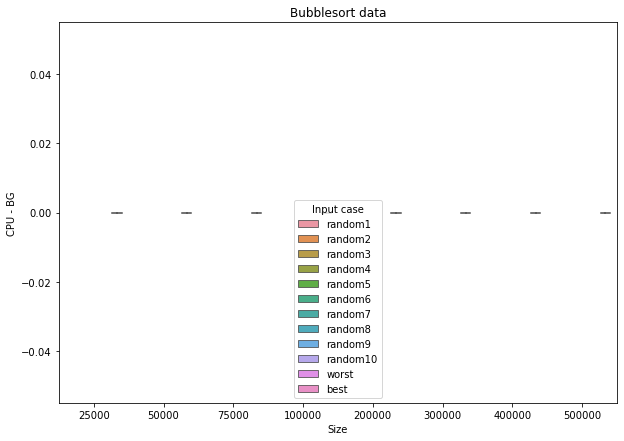

In [7]:
plt.figure(figsize=(10,7))
plt.title("Bubblesort data") # [dfCounting["Input case"]!="best"][dfCounting["Input case"]!="worst"]
sns.violinplot(data = dfBubbleSort, y = "CPU - BG", x = "Size", hue = "Input case")

## Calculating Bubblesort mean values for each PC


In [8]:
bubble16 = pd.read_csv("results16/bubbleSort-PC16.csv")
bubble16.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
bubble21 = pd.read_csv("Results21/bubbleSort-PC21.csv")
bubble21.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
bubble23 = pd.read_csv("Results23/bubbleSort-PC23.csv") 
bubble23.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
bubble6 = pd.read_csv("Results6/bubbleSort-PC6.csv")
bubble6.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]


readCSV16 = pd.read_csv("Results16/readCSV-PC16.csv")
readCSV16.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
readCSV6 = pd.read_csv("Results6/readCSV-PC6.csv")
readCSV6.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
readCSV21 = pd.read_csv("Results21/readCSV-PC21.csv")
readCSV21.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
readCSV23 = pd.read_csv("Results23/readCSV-PC23.csv")
readCSV23.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

#note: removed line 5361 from bubble16 and bubble21, incomplete data --> 2 tests missing

In [9]:
#remove data less than zero

def removeNonsense(df):
    df = df[df["PKG (J)"]>=0]
    df = df[df["CPU (J)"]>=0]
    df = df[df["Time (ms)"]>=0]
    return df

bubble21 = removeNonsense(bubble21)
bubble16 = removeNonsense(bubble16)
bubble23 = removeNonsense(bubble23)
bubble6 = removeNonsense(bubble6)

readCSV21 = removeNonsense(readCSV21)
readCSV16 = removeNonsense(readCSV16)
readCSV23 = removeNonsense(readCSV23)
readCSV6 = removeNonsense(readCSV6)


In [10]:
def makeinputColumn(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[0])

    df["Input case"] = l
makeinputColumn(bubble21)
makeinputColumn(bubble23)
makeinputColumn(bubble6)
makeinputColumn(bubble16)
print(bubble21.head())

def makeinputColumn_readCSV(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[1].lower())
    df["Input case"] = l
    
makeinputColumn_readCSV(readCSV16)
makeinputColumn_readCSV(readCSV21)
makeinputColumn_readCSV(readCSV23)
makeinputColumn_readCSV(readCSV6)


         Test name    PKG (J)    CPU (J) GPU (J)  Memory (J)  Temperature  \
0  random1-25000-1  13.687622  11.975342            0.452087           64   
1  random1-25000-1  13.029724  11.397583            0.402527           63   
2  random1-25000-1  11.844849  10.414124            0.423218           62   
3  random1-25000-1  11.333008   9.908752            0.398010           62   
4  random1-25000-1  13.409180  11.683655            0.410400           62   

   Time (ms) Input case  
0    1732.36    random1  
1    1704.73    random1  
2    1399.99    random1  
3    1416.54    random1  
4    1703.89    random1  


In [11]:
def makeSizecolumn(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[1]))

    df["Size"] = l
makeSizecolumn(bubble21)
makeSizecolumn(bubble23)
makeSizecolumn(bubble6)
makeSizecolumn(bubble16)

def makeSizecolumn_readCSV(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[-1]))

    df["Size"] = l

makeSizecolumn_readCSV(readCSV16)
makeSizecolumn_readCSV(readCSV21)
makeSizecolumn_readCSV(readCSV23)
makeSizecolumn_readCSV(readCSV6)

In [12]:
bubble16.head()

,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms),Input case,Size
0,random1-25000-1,13.232300,11.544128,,0.399902,69,1710.16,random1,25000
1,random1-25000-1,14.163696,12.361511,,0.493103,69,1723.56,random1,25000
2,random1-25000-1,13.530029,11.768127,,0.451172,69,1730.49,random1,25000
3,random1-25000-1,14.085632,12.302307,,0.486084,70,1704.74,random1,25000
4,random1-25000-1,14.142822,12.376465,,0.485718,70,1699.14,random1,25000


### remove outliers

In [13]:
def remove_outliers(df, type, size):
    q1 = df[df["Input case"] == type][df["Size"]==size]["CPU (J)"].quantile(q=0.25)
    q3 = df[df["Input case"] == type][df["Size"]==size]["CPU (J)"].quantile(q=0.75)
    IQR = q3 - q1 
    LF = q1 - 1.5* IQR
    UF = q3 + 1.5* IQR

    #print(f"For size, case: {size},{type}. Lower fence: {LF} Upper fence: {UF}.")
    df = df[df["Input case"] == type][df["Size"]==size][df["CPU (J)"] <= UF]
    df = df[df["Input case"] == type][df["Size"]==size][df["CPU (J)"] >= LF]

In [14]:
def remove_outliers_for_pc(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000]#,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    for case in range(len(c)):
        for size in range(len(s)):
            remove_outliers(df, c[case], s[size])
remove_outliers_for_pc(bubble16)
remove_outliers_for_pc(bubble6)
remove_outliers_for_pc(bubble21)
remove_outliers_for_pc(bubble23)

remove_outliers_for_pc(readCSV16)
remove_outliers_for_pc(readCSV6)
remove_outliers_for_pc(readCSV21)
remove_outliers_for_pc(readCSV23)

C:\Users\mathi\AppData\Local\Temp/ipykernel_21016/1945008725.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size]["CPU (J)"].quantile(q=0.25)
C:\Users\mathi\AppData\Local\Temp/ipykernel_21016/1945008725.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size]["CPU (J)"].quantile(q=0.75)
C:\Users\mathi\AppData\Local\Temp/ipykernel_21016/1945008725.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df["Input case"] == type][df["Size"]==size][df["CPU (J)"] <= UF]


In [15]:
def meanData(df,type,size):
    mean = df[df["Input case"] == type][df["Size"]==size].mean()
    mean["Input case"] = type
    return mean

def mean_of_dataset(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000]#,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    list_of_means = []
    for case in range(len(c)):
        for size in range(len(s)):
            list_of_means.append(meanData(df, c[case], s[size]))   
    return list_of_means


mean16 = mean_of_dataset(bubble16)
mean21 = mean_of_dataset(bubble21)
mean23 = mean_of_dataset(bubble23)
mean6 = mean_of_dataset(bubble6)

def list_of_case(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


'''def mean_of_dataset_readCSV(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000]#,600000,700000,800000,900000,1000000]
    c = list_of_case(df)
    list_of_means = []
    for case in range(len(c)):
        for size in range(len(s)):
            list_of_means.append(meanData(df, c[case], s[size]))   
    return list_of_means

avg16_readCSV = mean_of_dataset_readCSV(readCSV16)
avg21_readCSV = mean_of_dataset_readCSV(readCSV21)
avg23_readCSV = mean_of_dataset_readCSV(readCSV23)
avg6_readCSV = mean_of_dataset_readCSV(readCSV6)'''





C:\Users\mathi\AppData\Local\Temp/ipykernel_21016/1957891486.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp/ipykernel_21016/1957891486.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df[df["Input case"] == type][df["Size"]==size].mean()


'def mean_of_dataset_readCSV(df):\n    s = [25000,50000,75000,100000,200000,300000,400000,500000]#,600000,700000,800000,900000,1000000]\n    c = list_of_case(df)\n    list_of_means = []\n    for case in range(len(c)):\n        for size in range(len(s)):\n            list_of_means.append(meanData(df, c[case], s[size]))   \n    return list_of_means\n\navg16_readCSV = mean_of_dataset_readCSV(readCSV16)\navg21_readCSV = mean_of_dataset_readCSV(readCSV21)\navg23_readCSV = mean_of_dataset_readCSV(readCSV23)\navg6_readCSV = mean_of_dataset_readCSV(readCSV6)'

In [16]:
print(mean16)

[PKG (J)         4.165914
CPU (J)         3.652538
Memory (J)      0.200856
Temperature      68.1675
Time (ms)      413.64096
Size             25000.0
Input case          best
dtype: object, PKG (J)          7.768649
CPU (J)          6.803459
Memory (J)       0.293781
Temperature         65.96
Time (ms)      902.304655
Size              50000.0
Input case           best
dtype: object, PKG (J)          16.365787
CPU (J)          14.367942
Memory (J)        0.496647
Temperature          62.65
Time (ms)      2053.889875
Size               75000.0
Input case            best
dtype: object, PKG (J)        26.71403
CPU (J)        23.47995
Memory (J)     0.730396
Temperature       61.59
Time (ms)      3436.101
Size           100000.0
Input case         best
dtype: object, PKG (J)           98.830603
CPU (J)           87.058202
Memory (J)         2.339077
Temperature           61.38
Time (ms)      12994.320525
Size               200000.0
Input case             best
dtype: object, PKG (J)       

In [17]:
def make_sub_readCSV(inList):
    for i in range(len(inList)):
        case = inList[i]["Input case"]
        size = inList[i]["Size"]
        if case == "best":
            case = "sorted"
        if case == "worst":
            case = "reversesorted"
        inList[i]["CPU - readCSV"] = inList[i]["CPU (J)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["CPU (J)"]
        inList[i]["Time - readCSV"] = inList[i]["Time (ms)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["Time (ms)"]
        inList[i]["Memory - readCSV"] = inList[i]["Memory (J)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["Memory (J)"]

make_sub_readCSV(mean16)
make_sub_readCSV(mean21)
make_sub_readCSV(mean23)
make_sub_readCSV(mean6)

C:\Users\mathi\AppData\Local\Temp/ipykernel_21016/1740927967.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inList[i]["CPU - readCSV"] = inList[i]["CPU (J)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["CPU (J)"]
C:\Users\mathi\AppData\Local\Temp/ipykernel_21016/1740927967.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inList[i]["CPU - readCSV"] = inList[i]["CPU (J)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["CPU (J)"]
C:\Users\mathi\AppData\Local\Temp/ipykernel_21016/1740927967.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inList[i]["Time - readCSV"] = inList[i]["Time (ms)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["Time (ms)"]
C:\User

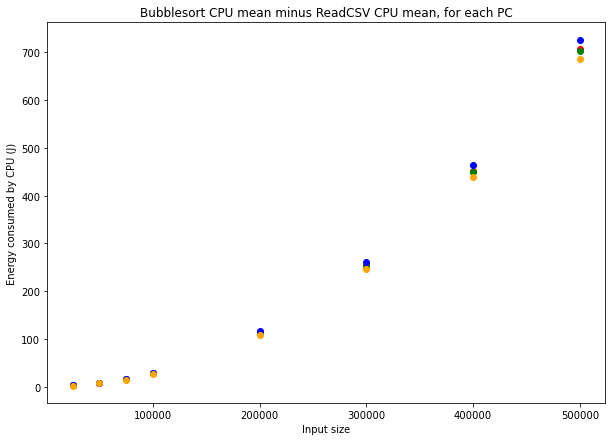

No handles with labels found to put in legend.


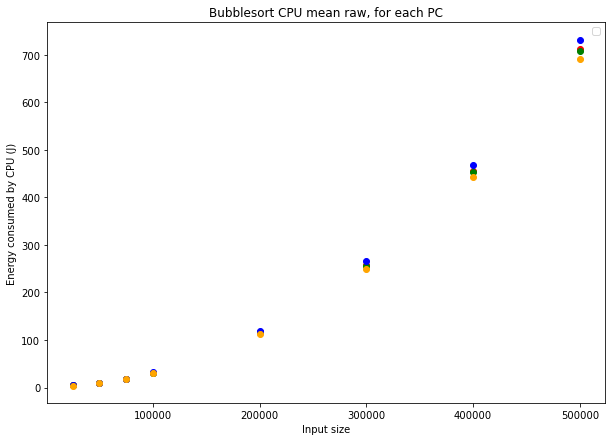

In [18]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "worst":
        plt.plot( mean16[i]["Size"],mean16[i]["CPU - readCSV"],"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "worst":
        plt.plot( mean21[i]["Size"],mean21[i]["CPU - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "worst":
        plt.plot( mean23[i]["Size"],mean23[i]["CPU - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "worst":
        plt.plot( mean6[i]["Size"],mean6[i]["CPU - readCSV"],"o", color = "orange")

plt.title("Bubblesort CPU mean minus ReadCSV CPU mean, for each PC")
plt.xlabel("Input size")
plt.ylabel("Energy consumed by CPU (J)")
plt.show()

plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "worst":
        plt.plot( mean16[i]["Size"],mean16[i]["CPU (J)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "worst":
        plt.plot( mean21[i]["Size"],mean21[i]["CPU (J)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "worst":
        plt.plot( mean23[i]["Size"],mean23[i]["CPU (J)"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "worst":
        plt.plot( mean6[i]["Size"],mean6[i]["CPU (J)"],"o", color = "orange")
plt.title("Bubblesort CPU mean raw, for each PC")
plt.xlabel("Input size")
plt.ylabel("Energy consumed by CPU (J)")
plt.legend()
plt.show()

No handles with labels found to put in legend.


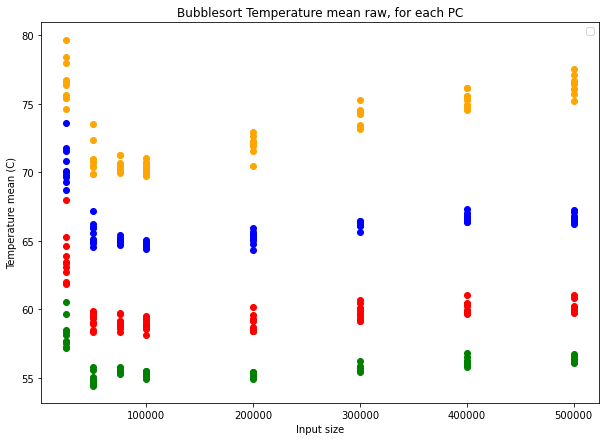

In [19]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"].startswith("random"):
        plt.plot( mean16[i]["Size"],mean16[i]["Temperature"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"].startswith("random"):
        plt.plot( mean21[i]["Size"],mean21[i]["Temperature"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Size"],mean23[i]["Temperature"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"].startswith("random"):
        plt.plot( mean6[i]["Size"],mean6[i]["Temperature"],"o", color = "orange")
plt.title("Bubblesort Temperature mean raw, for each PC")
plt.xlabel("Input size")
plt.ylabel("Temperature mean (C)")
plt.legend()
plt.show()

No handles with labels found to put in legend.


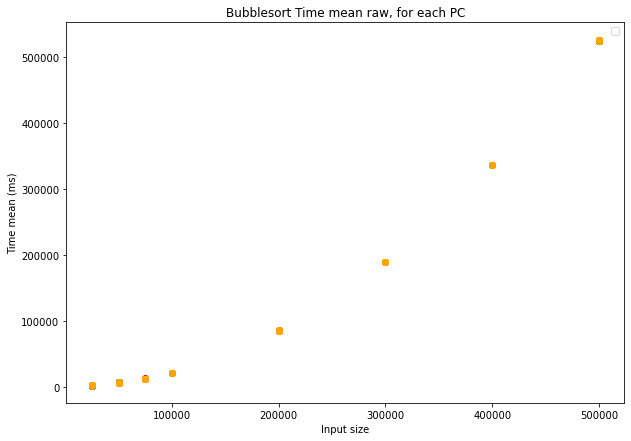

In [20]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"].startswith("random"):
        plt.plot( mean16[i]["Size"],mean16[i]["Time (ms)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"].startswith("random"):
        plt.plot( mean21[i]["Size"],mean21[i]["Time (ms)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Size"],mean23[i]["Time (ms)"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"].startswith("random"):
        plt.plot( mean6[i]["Size"],mean6[i]["Time (ms)"],"o", color = "orange")
plt.title("Bubblesort Time mean raw, for each PC")
plt.xlabel("Input size")
plt.ylabel("Time mean (ms)")
plt.legend()
plt.show()

No handles with labels found to put in legend.


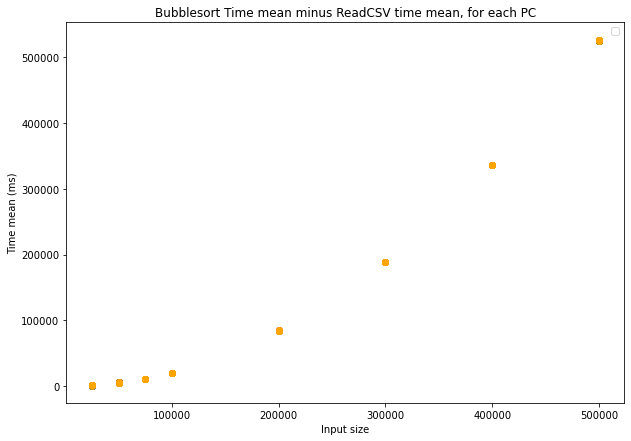

In [21]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"].startswith("random"):
        plt.plot( mean16[i]["Size"],mean16[i]["Time - readCSV"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"].startswith("random"):
        plt.plot( mean21[i]["Size"],mean21[i]["Time - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Size"],mean23[i]["Time - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"].startswith("random"):
        plt.plot( mean6[i]["Size"],mean6[i]["Time - readCSV"],"o", color = "orange")
plt.title("Bubblesort Time mean minus ReadCSV time mean, for each PC")
plt.xlabel("Input size")
plt.ylabel("Time mean (ms)")
plt.legend()
plt.show()

No handles with labels found to put in legend.


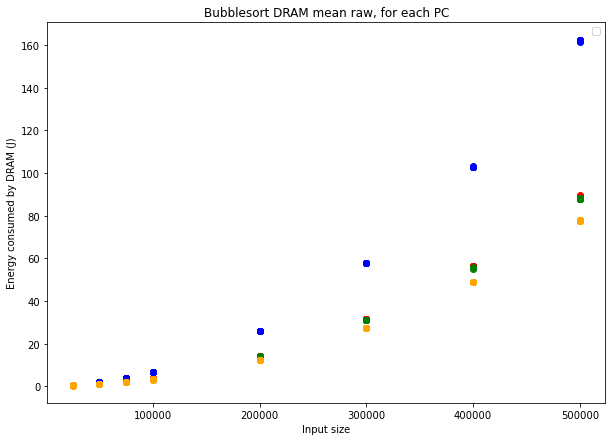

In [22]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"].startswith("random"):
        plt.plot( mean16[i]["Size"],mean16[i]["Memory (J)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"].startswith("random"):
        plt.plot( mean21[i]["Size"],mean21[i]["Memory (J)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Size"],mean23[i]["Memory (J)"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"].startswith("random"):
        plt.plot( mean6[i]["Size"],mean6[i]["Memory (J)"],"o", color = "orange")
plt.title("Bubblesort DRAM mean raw, for each PC")
plt.xlabel("Input size")
plt.ylabel("Energy consumed by DRAM (J)")
plt.legend()
plt.show()

No handles with labels found to put in legend.


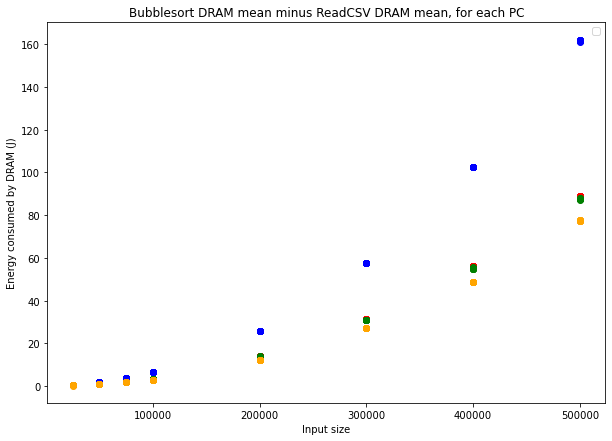

In [23]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"].startswith("random"):
        plt.plot( mean16[i]["Size"],mean16[i]["Memory - readCSV"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"].startswith("random"):
        plt.plot( mean21[i]["Size"],mean21[i]["Memory - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Size"],mean23[i]["Memory - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"].startswith("random"):
        plt.plot( mean6[i]["Size"],mean6[i]["Memory - readCSV"],"o", color = "orange")
plt.title("Bubblesort DRAM mean minus ReadCSV DRAM mean, for each PC")
plt.xlabel("Input size")
plt.ylabel("Energy consumed by DRAM (J)")
plt.legend()
plt.show()

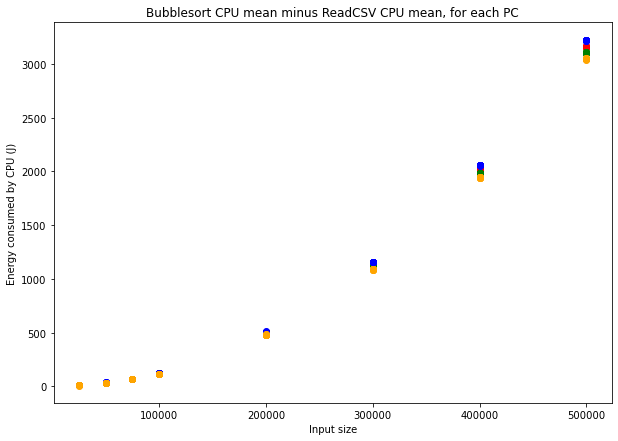

No handles with labels found to put in legend.


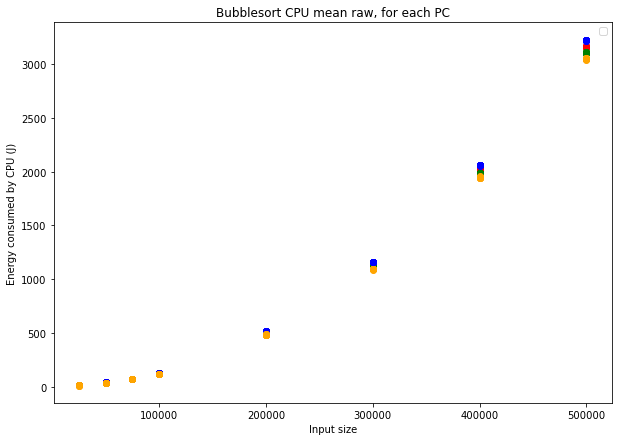

In [24]:
#plotting all random as a spreadshot
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"].startswith("random"):
        plt.plot( mean16[i]["Size"],mean16[i]["CPU - readCSV"],"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"].startswith("random"):
        plt.plot( mean21[i]["Size"],mean21[i]["CPU - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Size"],mean23[i]["CPU - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"].startswith("random"):
        plt.plot( mean6[i]["Size"],mean6[i]["CPU - readCSV"],"o", color = "orange")

plt.title("Bubblesort CPU mean minus ReadCSV CPU mean, for each PC")
plt.xlabel("Input size")
plt.ylabel("Energy consumed by CPU (J)")
plt.show()

plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"].startswith("random"):
        plt.plot( mean16[i]["Size"],mean16[i]["CPU (J)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"].startswith("random"):
        plt.plot( mean21[i]["Size"],mean21[i]["CPU (J)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Size"],mean23[i]["CPU (J)"],"o", color = "blue")

for i in range(len(mean6)): # == c:
    if mean6[i]["Input case"].startswith("random"):
        plt.plot( mean6[i]["Size"],mean6[i]["CPU (J)"],"o", color = "orange")

plt.title("Bubblesort CPU mean raw, for each PC")
plt.xlabel("Input size")
plt.ylabel("Energy consumed by CPU (J)")
plt.legend()
plt.show()